# Confusion matix calculations with scikit-learn

## Introduction

- Data from Kaggle's Titanic competition: [data](../data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: use scikit-learn to calculate confusion matrix values
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Read the data into Pandas

In [10]:
import pandas as pd
path = '../data/'
url = path + 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [11]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

### 1b: Split the data into training and testing sets

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 2: Choose and import the estimator

In [13]:
from sklearn.linear_model import LogisticRegression

### 3: Instantiate the estimator into a variable

In [14]:
logreg = LogisticRegression(C=1e9)

### 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [15]:
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

### 5: Make predictions on the testing set

In [16]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

### 6: Calculate the accuracy

In [17]:
# calculate classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


### Compare the testing accuracy to the null accuracy

In [18]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
Name: Survived, dtype: float64

In [19]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

In [36]:
y_test.mean()

0.4260089686098655

## Confusion matrix of Titanic predictions

In [21]:
# print confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


In [22]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [23]:
print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [24]:
# calculate the sensitivity
print (TP / float(TP + FN))
print (44 / float(44 + 51))

0.463157894737
0.4631578947368421


In [25]:
# calculate the specificity
print (TN / float(TN + FP))
print (105 / float(105 + 23))

0.8203125
0.8203125


In [32]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
# the index no 1 is the 

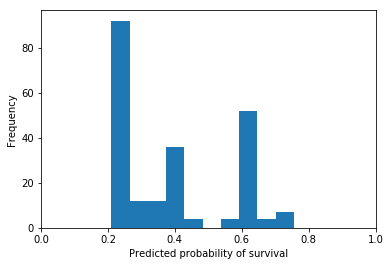

In [33]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [ ]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [27]:
# old confusion matrix
print (confusion)

[[105  23]
 [ 51  44]]


In [29]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


In [30]:
# new sensitivity (higher than before)
# WHEN POSITIVE IS CORRECT
print (63 / float(63 + 32))

0.6631578947368421


In [26]:
# new specificity (lower than before)
# WHEN NEGATIVE IS CORRECT
print (72 / float(72 + 56))

0.5625
